<a href="https://colab.research.google.com/github/Enobongpaul/Exploratory-Data-analysis/blob/main/Exploratory_Data_Analysis_Of_MRI_%26_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import numpy as np # For linear Algebra
import pandas as pd # Used to work with dataframes
import matplotlib.pyplot as plt # Used to create different statistical plots
import seaborn as sns # makes plot look less generic and a bit styled
sns.set()
# Importing statistical function for t-test from scipy
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder # used to convert categorical data
from sklearn.cluster import KMeans # Used to create cluster analysis
from sklearn.preprocessing import StandardScaler # Standardizing the data for PCA
from sklearn.decomposition import PCA # Used for conducting the PCA

## Data preparation
This dataset is the Longitudinal MRI Study in MRI and Alzheimers Dataset on Kaggle. This set consists of a longitudinal collection of 150
subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions.
For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed
and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects
were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to
moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were
subsequently characterized as demented at a later visit.


# Reading Data from files

In [ ]:
from google.colab import files
uploaded= files.upload()


Saving oasis_longitudinal.xlsx to oasis_longitudinal.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['oasis_longitudinal.xlsx']))
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


# To have a summary view of the file


In [ ]:
data_long = pd.read_excel('oasis_longitudinal.xlsx')
data_long.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


# Explaining Column names
S/N                    Description                               Data type
1. subject id         // Patients Id                          //Numerical
2. MRI ID              //MRI IDreference of patients                //Numerical
3. Group               //Demented or undemented                //Categorical
4. Visit   //order of visits,1st,2nd.../Numerical                               
5. MR Delay// MR delay time                           //Numerical
6. Hand  //dominate hand                               //categorical
7. Age    // male or female                             //Numerical
8. EDUC  // Years of education                               //Numerical
9. SES  // level of social economic status//categorical
10. MMSE//Mini mental state examination                //Numerical
11. CDR//Clinical dementia rating                      //Categorical
12. eTIV //Estimated Total Intracranial Volume         //Numerical
13. nWBV//Normalize Whole Brain Volume                //Numerical
14. ASF// Normalize Whole Brain Volume               //Numerical

# Cleaning the data

In [ ]:
# handling missing values
data_long.isnull().sum() # shows the total missing data


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
# some subjects didnt fill the SES column of the form on their first visits
# Dropping visits made after the first visit would show a true representation of the missing value of the dataset considering the dataset was
# collected over a few visits for some patients.

data_long_fv = data_long.loc[data_long['Visit']==1] # since we want to only look at the first visit
data_long_fv = data_long_fv.reset_index(drop=True) # We need to reset the index after filtering the visit data by first visit
data_long_fv.isnull().sum()


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
data_long_fv['SES'] = data_long_fv['SES'].fillna(data_long_fv['SES'].value_counts().index[0]) # this fills missing value with the modal class
data_long_fv.isna().sum() #to check if there are still missing value
#This method handles missing values without losing any data when using the filtered data.


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

Since I used the modal class to fill the missing values for the data with only first visit, I can also use the same method to fill missing values for
the original data because the missing values are repeated due to each subject having different number of visit in which the Value was already
missing from the initial visit.
The missing value(2) in the MMSE data is caused by it not being filled in subsequent scans for one subject, which is noticed when the data is
filtered by first visit. Dropping the rows which have missing values for the MMSE column, since filling it would not be the best method for
handling this type of missing value because each individual's MMSE score can change or remain the same over the course of the different
scans.

I dropped the rows with missing value in the MMSE column because each individual has their own MMSE score and can change with time

In [ ]:
data_long['SES'] = data_long['SES'].fillna(data_long['SES'].value_counts().index[0]) # this fills missing value with the modal class
data_long = data_long.dropna(axis=0)
data_long.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

# Now lets take a look at the new dataset and see the difference.

In [ ]:
data_long.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  371 non-null    object 
 1   MRI ID      371 non-null    object 
 2   Group       371 non-null    object 
 3   Visit       371 non-null    int64  
 4   MR Delay    371 non-null    int64  
 5   M/F         371 non-null    object 
 6   Hand        371 non-null    object 
 7   Age         371 non-null    int64  
 8   EDUC        371 non-null    int64  
 9   SES         371 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         371 non-null    float64
 12  eTIV        371 non-null    int64  
 13  nWBV        371 non-null    float64
 14  ASF         371 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 46.4+ KB


The difference between the rows of the original dataset and after handling missing value is 2


# Converting categorical datasets
I will be converting the Gender to 1 for Male and 0 for Female as this directly represents each category in analysis and converts the
data from object to an integer.
For the Group, I will convert the three categories of Nondemented and Demented to 0 and 1 respectively. 

Converted representing those who
were originally diagnosed as nondemented on the first visit but subsequently diagnosed as demented in following visits.


In [ ]:
# data_long = data_long.set_index('Subject ID') # this sets the index of the data to the Subject ID column.
data_long = data_long.drop(['MRI ID', 'Hand'], axis = 1) # I want to drop the MRI ID number because it will have no impact in the model.
# data_long = data_long[['Group', 'Visit', 'M/F', 'Age', 'EDUC', 'SES',
# 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']] # to drop the columns with the subject and mri ID

In [ ]:
data_long.head(5)

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [ ]:
LE = LabelEncoder()
cols = ['Group', 'M/F']
data_long[cols] = data_long[cols].apply(LE.fit_transform) # this converts the categorical variable
# When converting the M/F column, M gets assigned 1 while F gets assigned 0
# There are 3 categories in the group column, upon converting Nondemented gets assigned 2, Demented gets assigned 1 and Converted gets assigned 0
data_long.rename(columns={'M/F':'Gender'}, inplace=True) # renaming the M/F column to Gender

In [ ]:
data_long.head(10) # shows the converted categories


,Subject ID,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,2,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,2,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,1,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,1,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,1,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,2,1,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,2,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,2,1,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,2,2,1010,1,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,2,3,1603,1,85,12,4.0,30.0,0.0,1699,0.705,1.033


#Aggregating Data

In [ ]:
data_long_ag = data_long.groupby(['Subject ID']).mean()
data_long_ag.head(3)


,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
OAS2_0001,2.0,1.5,228.500000,1.0,87.5,14.0,2.0,28.500000,0.0,1995.500000,0.688500,0.8795
OAS2_0002,1.0,2.0,818.333333,1.0,77.0,12.0,2.0,24.333333,0.5,1704.666667,0.716667,1.0300
OAS2_0004,2.0,1.5,269.000000,0.0,89.0,18.0,3.0,27.500000,0.0,1207.500000,0.714000,1.4530


In [ ]:
data_long_ag.shape

(150, 12)

There are 150 rows after aggregating the data by the subject ID, some information about their subsequent visit would be lost and this would
be as a result in the loss of context for this data.


#Exploratory Data 


 Analyzing the feasibility of values



In [ ]:
data_long.describe()


,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1.412399,1.878706,593.876011,0.431267,77.018868,14.611860,2.439353,27.342318,0.287062,1489.876011,0.729526,1.193776
std,0.665568,0.923480,636.636500,0.495922,7.660864,2.877737,1.111835,3.683244,0.371912,174.990473,0.037229,0.136533
min,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,2.000000,2.000000,552.000000,0.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,2.000000,2.000000,869.500000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,2.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


When studying the table, focus is placed on the max and min values of the different features to determine if they are within feasible ranges,
such as:


*   
MR Delay: A time delayed contrast enhanced MRI scan was carried out for subjects after their first visit, and in subsequent visits. Higher
values represent increasing time delays for subsequent scans carried out for each subject.
*   Years of Education: are there people with only 6 years of completed education? Yes

*   Minimental State Examination (MMSE): are there people with a value of 4? Yes, because The Mini-Mental State Examinaion(MMSE) is a
set of 30 question used to check for cognitive impairment. For context, scores between 25 and 30 are considered normal, scores
between 21-24 are considered mildly impaired, scores between 10-20 are considered moderately impaired and scores less than 10 are
considered severely impaired. A value of 4 shows one is severely impaired.


All features are within feasible ranges when the context of each feature is considered.










# Univariate data analysis

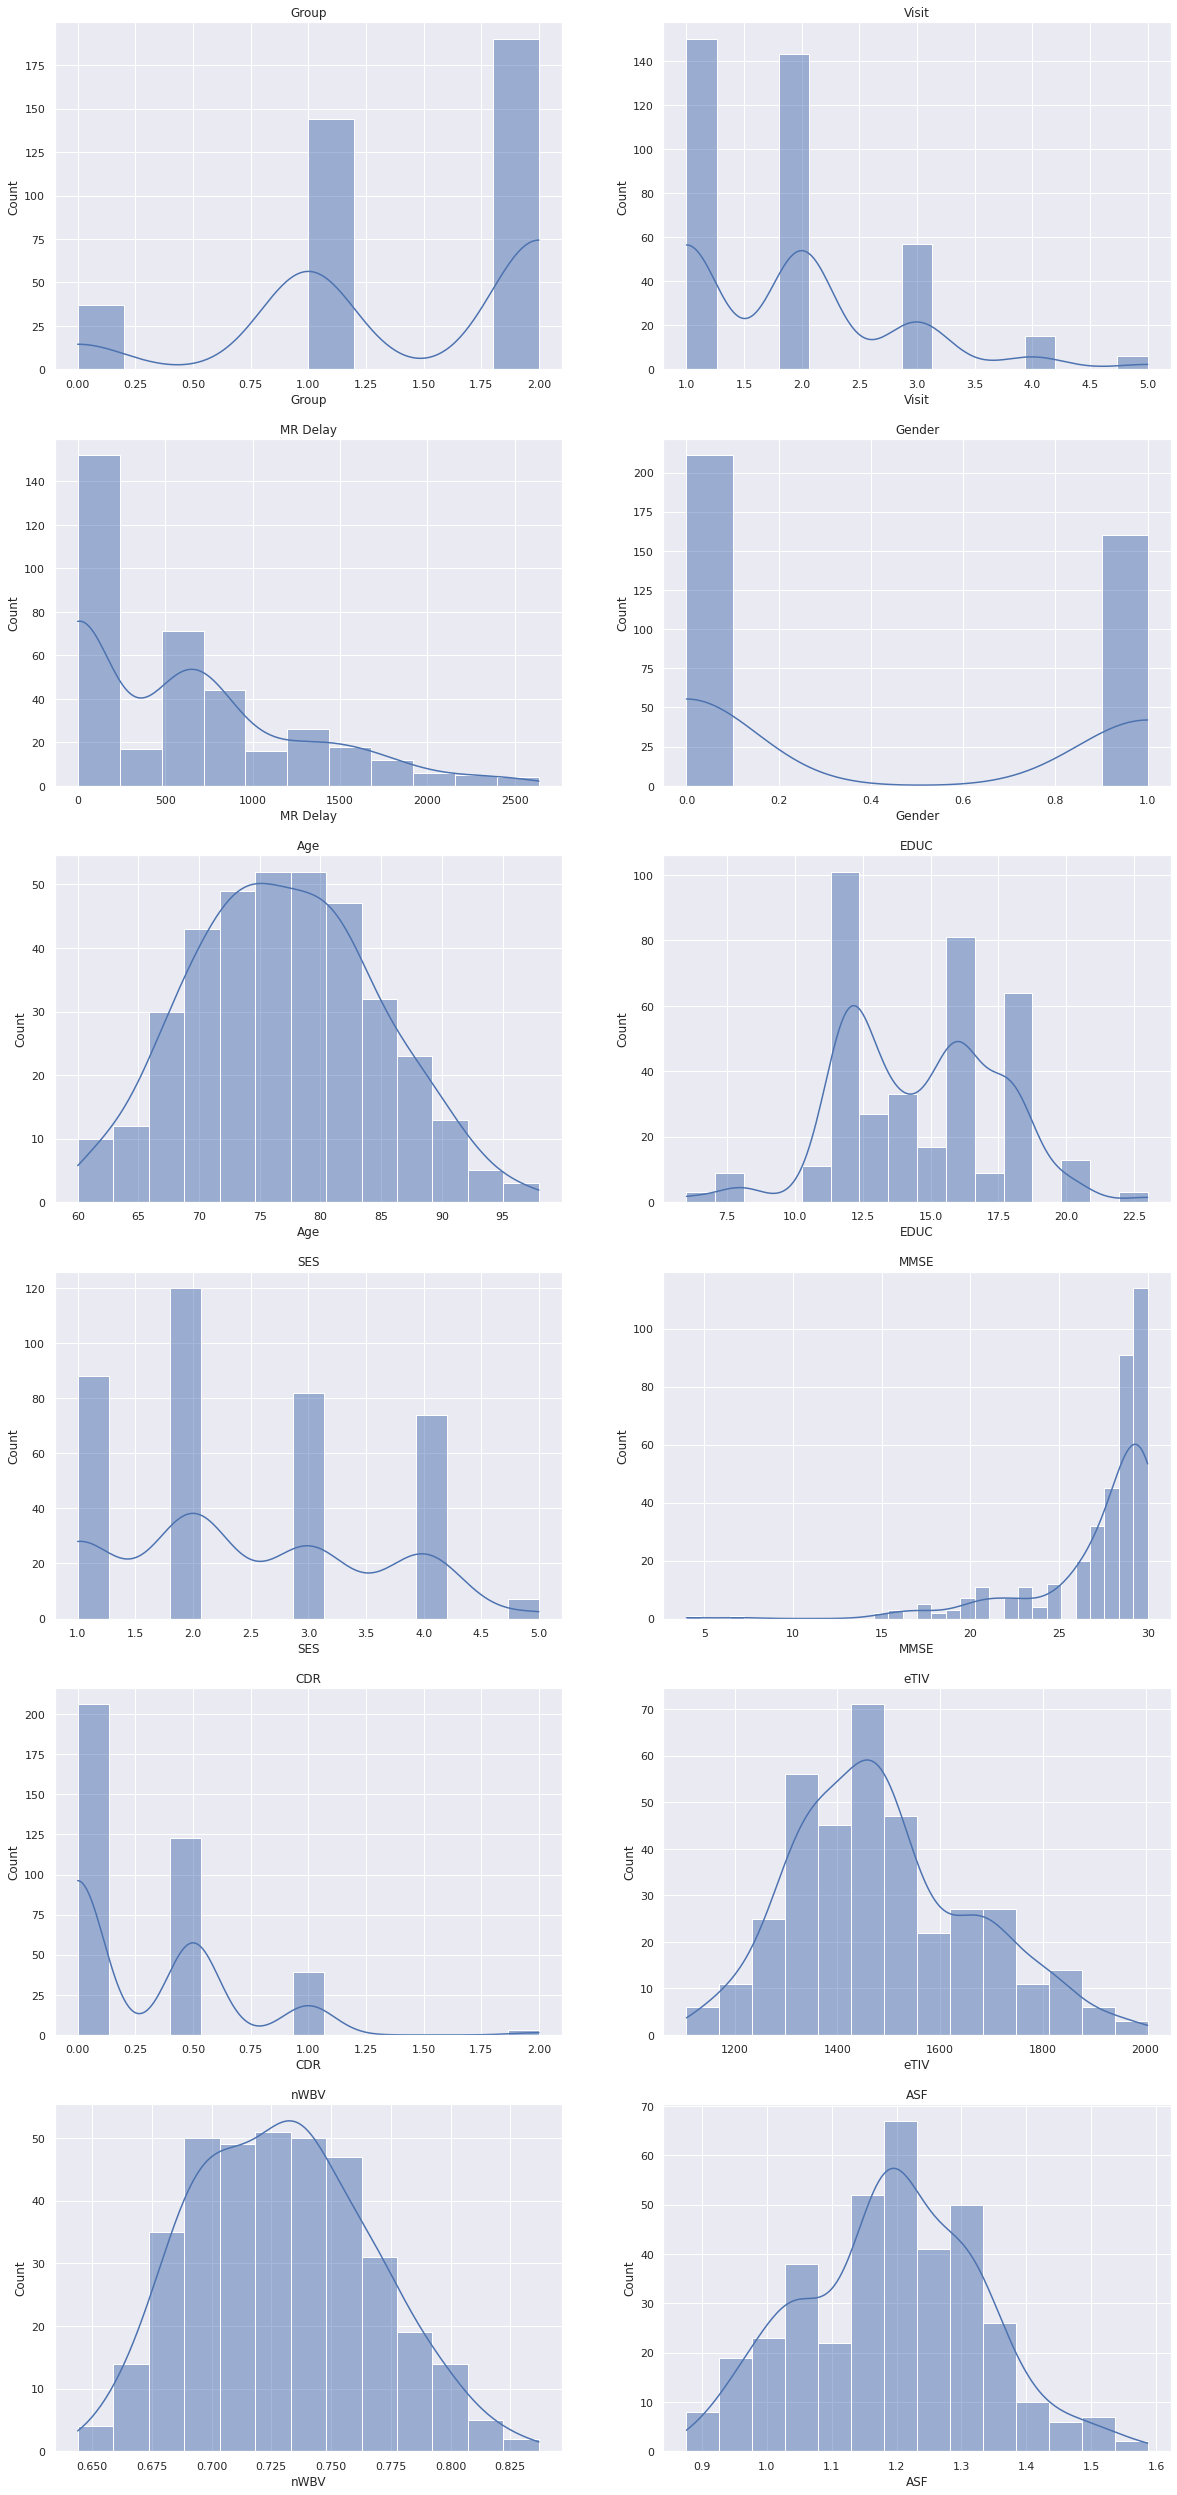

In [ ]:
# plot histogram and KDE of all the features using a for loop
cols = ['Group', 'Visit', 'MR Delay', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
fig=plt.figure(figsize=(20,60)) #12 plots in 2 columns =>6 rows
i=1
for col in cols:
    plt.subplot(8,2,i)
    #combination of histogram and KDE with seaborns histplot()
    sns.histplot(data_long[col], kde=True)
    plt.title(col) #setting title of the histogram
    i=i+1



Dicussion on the Plots

*   'Group', 'Visit', 'Gender', 'SES', 'CDR' are categorical variables hence why there are gaps between the bins of the histogram and the KDE
have multiple peaks for each bin.

*   'Age', 'eTIV', 'nWBV', and 'ASF' have the most similar curves and histograms when compared to a normal distribution.

*   'MMSE' shows a left skewed distribution, with its values concentrated on the right side of the graph.

*   'EDUC' shows 2 peaks with one being higher and represent the concentration of the values for this feature.







#Dealing with outliers

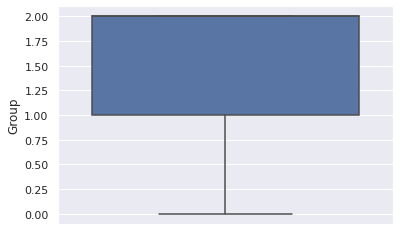

In [ ]:
sns.boxplot(y=data_long.Group)


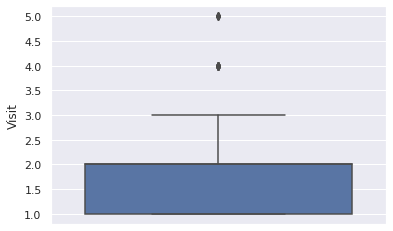

In [ ]:
sns.boxplot(y=data_long.Visit)


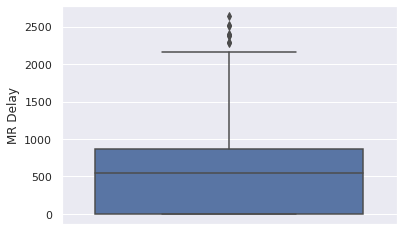

In [ ]:
sns.boxplot(y=data_long['MR Delay'])


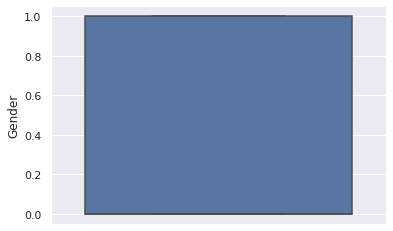

In [ ]:
sns.boxplot(y=data_long.Gender)


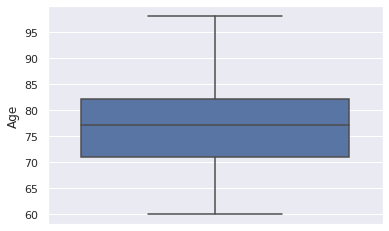

In [ ]:
sns.boxplot(y=data_long.Age)


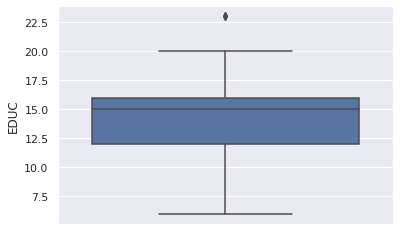

In [ ]:
sns.boxplot(y=data_long.EDUC)


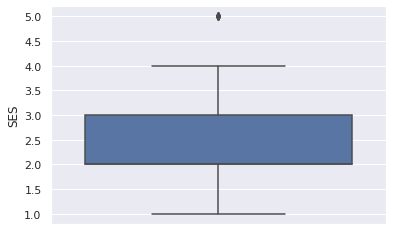

In [ ]:
sns.boxplot(y=data_long.SES)


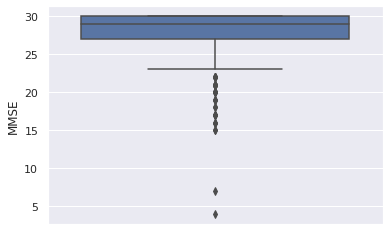

In [ ]:
sns.boxplot(y=data_long.MMSE)


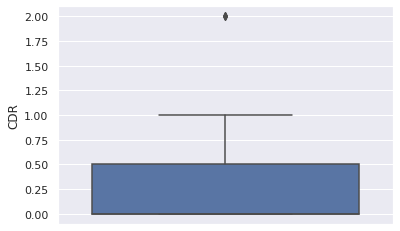

In [ ]:
sns.boxplot(y=data_long.CDR)


in this study, i wont be taking out the outliers because they provide some context from the dataset

## Heatmaps

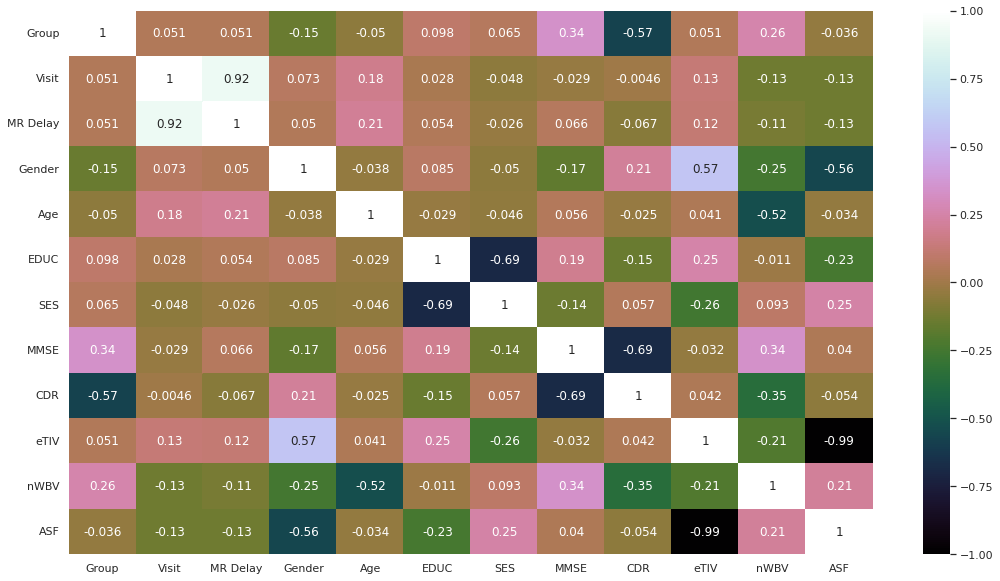

In [ ]:
corr = data_long.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='cubehelix')
plt.show()

From the heatmap

Very Obvious Correlations that test the credibility of the data. E.g. if these correlations would not be high (positive or negative) something
would really be wrong:

*   Estimated Total Intracranial Volume (eTIV) and Atlas Scaling Factor (ASF) have a very clear negative correlation.
*   Visit and MR Delay have a very clear positive correlation.
*  Clinical Dementia Rating and Mini Mental State Examination have a strong   negative correlation
*  Years of Education and Socioeconomic status have a strong negative correlation

*   Age and nWBV have a strong negative correlation. Older individuals tend to lose brain volume.

 some less obvious but intresting insight
*   ASF is positively correlated with SES and nWBV.
*   MMSE and nWBV are positively correlated.
*   nWBV and CDR are negatively correlated.
important correlations with Group and Gender:

*   Group have a positive correlation with MMSE and nWBV
*   Group have a negative correlation with CDR and Gender
*   Gender have a positive correlation with eTIV and CDR
*   Gender have a negative correlation with ASF, nWBV, MMSE and Group




   
     
    
   








# Scatterplots

Another way to visualize the relationship between variables is to plot their values in a 2-dimensional plot called scatterplots.

The intrest here is to find variables that are correlated to the Group variable which groups the subjects as demented, nondemented or
converted and the Gender variable. 

I have identified 2 variables that are positively correlated to the Group variables and 6 variables that
either have positive or negative correlation with the Gender variables respectively. 

A pairwise comparison in form of scatterplots can visualize
which ones of these features are correlated with one another.
Although the Age variables shows very little correlation, I am interested in seeing its correlation against the other variables in a scatterplot.

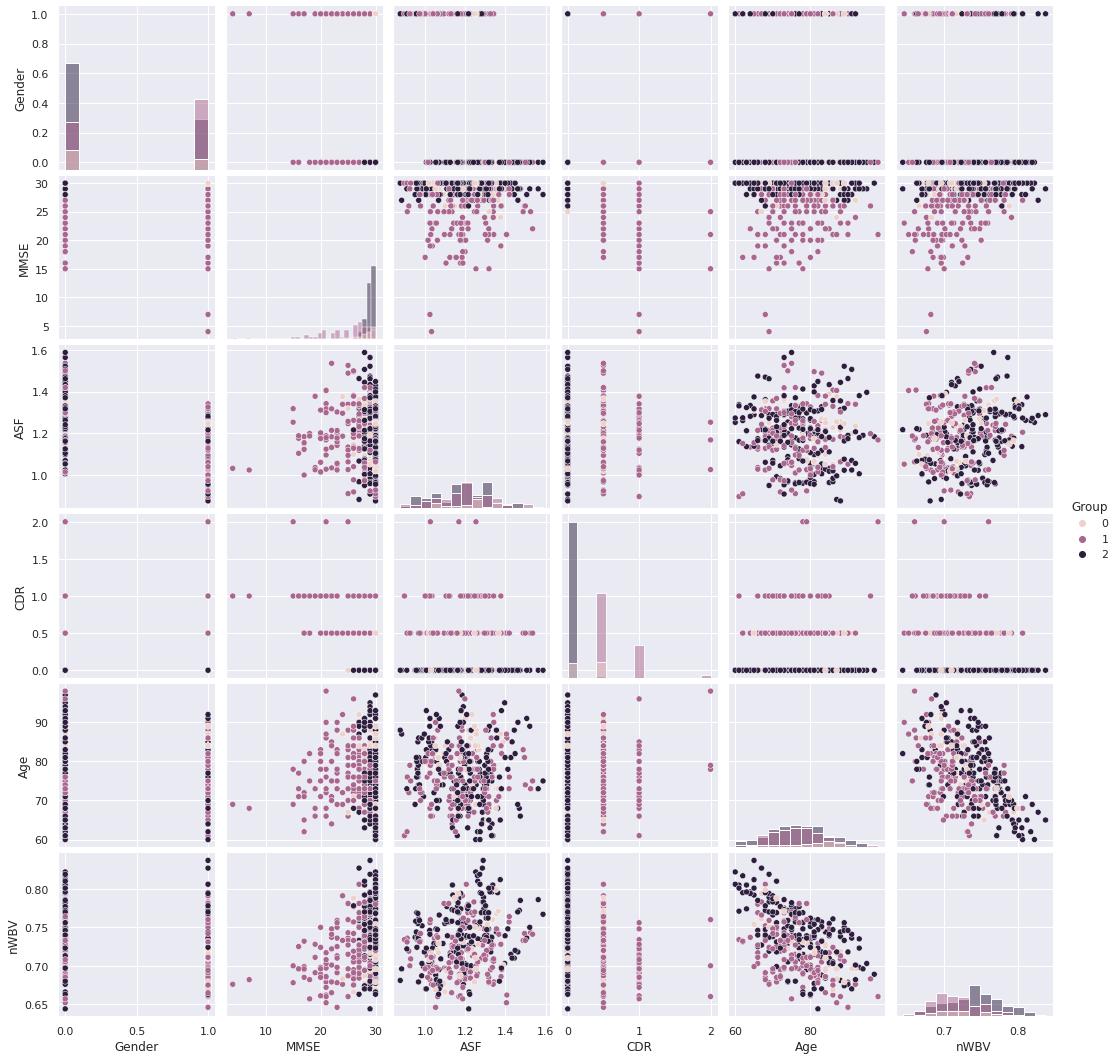

In [ ]:
# Use of seaborns pairplot to plot all pairs of scatterplots
# I am curious to see the interaction of ASF with the variables that have correlation with the Group variable
sns.pairplot(data_long.loc[:,['Group', 'Gender', 'MMSE', 'ASF', 'CDR', 'Age', 'nWBV']], hue='Group', diag_kind='hist')

From the above graphs we can clearly see that those grouped as demented have relatively smaller values for nWBV, MMSE, and higher
values for CDR. Those who were converted from nondemented to demented show no noticeable placement in either of the graph and are
mostly found in the middle of the nWBV vs Age graph. The Age vs ASF shows no clear distinction between nondemented, demented and
converted groups.

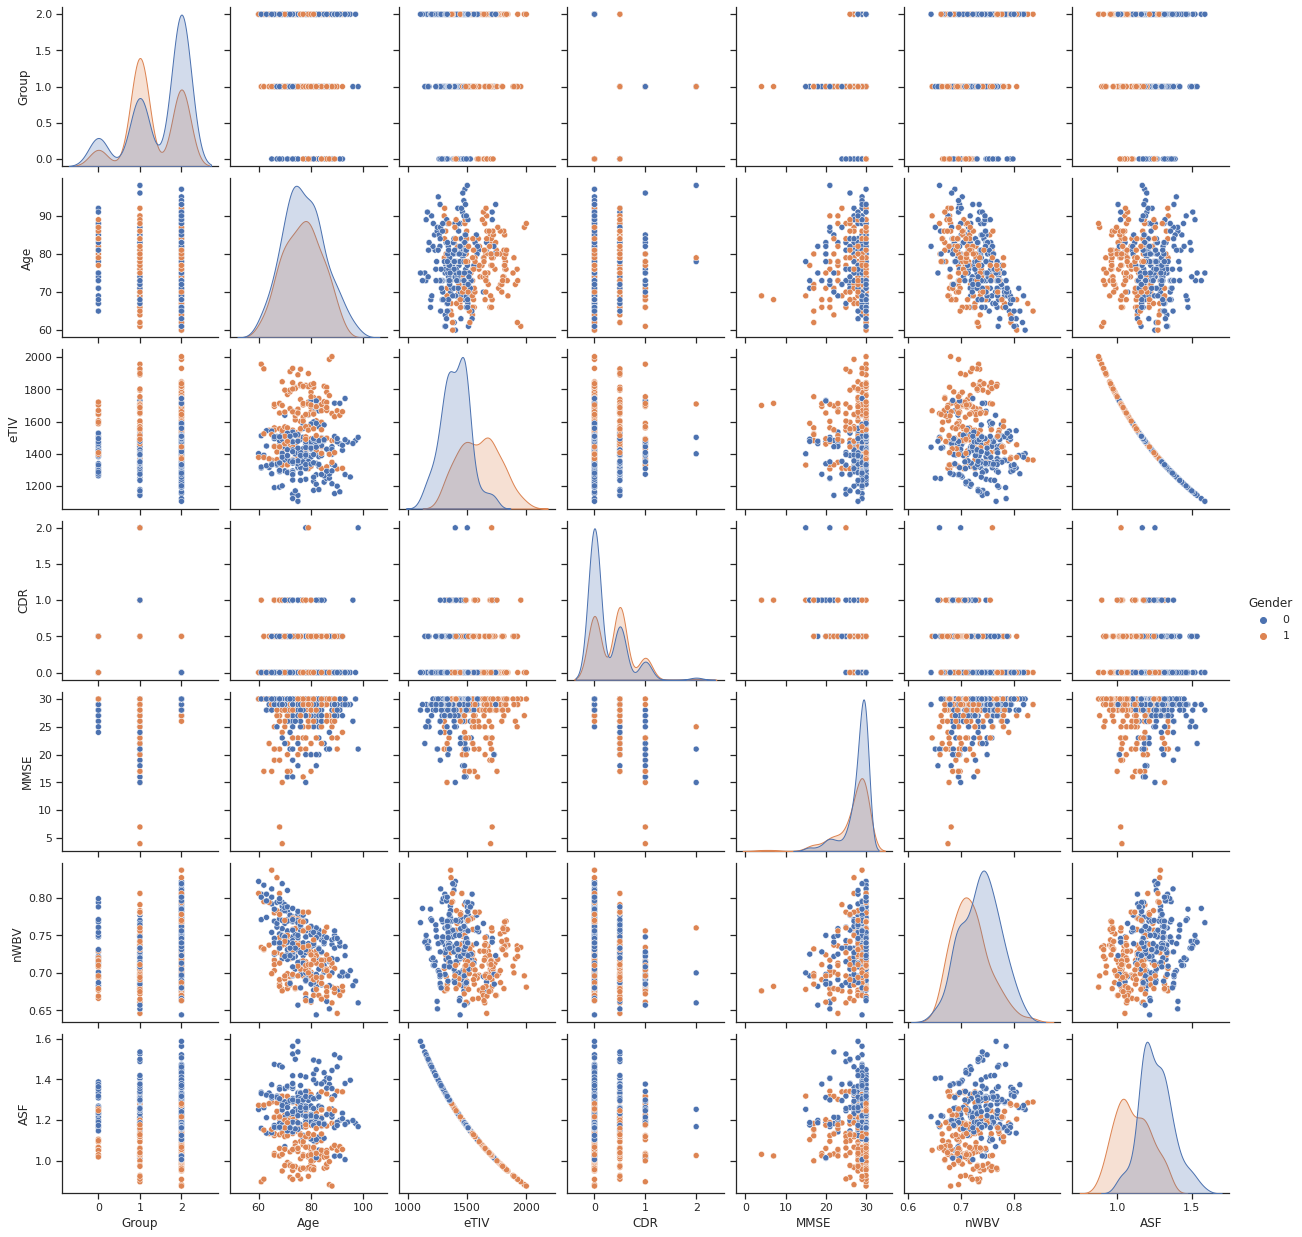

In [ ]:
sns.set_style('ticks')
sns.pairplot(data_long.loc[:,['Gender', 'Group', 'Age', 'eTIV', 'CDR',
'MMSE', 'nWBV', 'ASF']], hue='Gender')

# Joint distribution plots with regression fit


In [ ]:
# data_long_new_index = data_long.reset_index(drop=True)
# data_long_new_index.head()


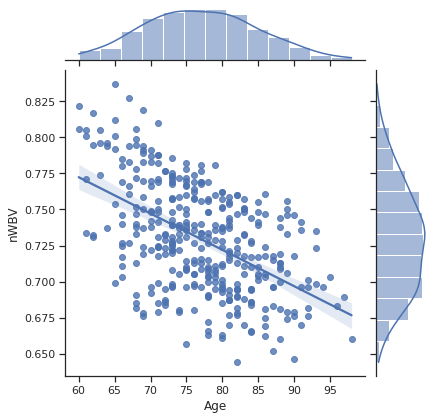

In [ ]:
sns.jointplot(data=data_long, x='Age', y='nWBV', kind='reg')


The above plot shows a graphical representation of the negative correlation between nWBV and Age. Since as one gets older the normalized
whole brain volume reduces.


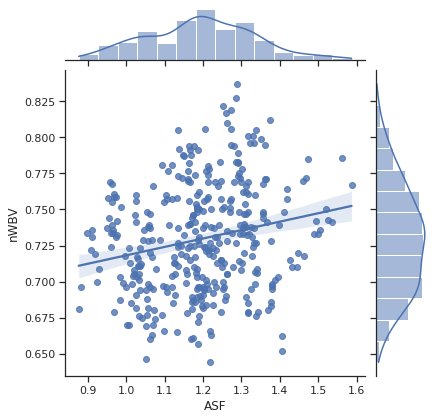

In [ ]:
sns.jointplot(data=data_long, x='ASF', y='nWBV', kind='reg')


The above plot shows a graphical representation of the slightly positive correlation between nWBV and ASF, because there is no high
positive correlation between the two variables, the values are dispersed around the plane.

# Plotting category Dependency
ploting multiple plots using each categorical data as hue for each plot to check their relationships

<Figure size 576x432 with 0 Axes>

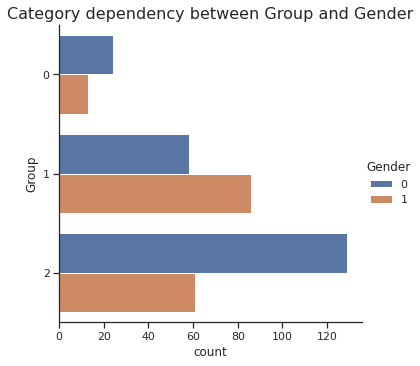

In [ ]:
plt.figure(figsize=(8,6))
sns.catplot(y="Group", hue='Gender', kind="count", data=data_long)
plt.title('Category dependency between Group and Gender', size=16)
plt.show()


<Figure size 576x432 with 0 Axes>

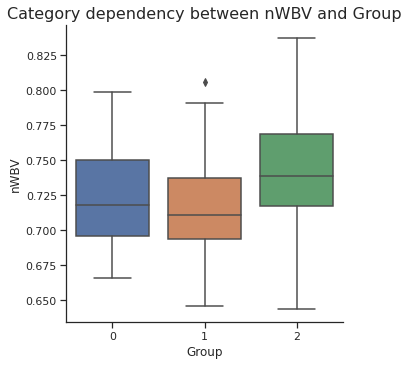

In [ ]:
plt.figure(figsize=(8,6))
sns.catplot(y="nWBV", x='Group', kind="box", data=data_long)
plt.title('Category dependency between nWBV and Group', size=16)
plt.show()


<Figure size 576x432 with 0 Axes>

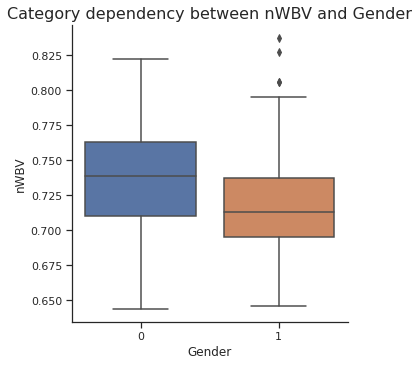

In [ ]:
plt.figure(figsize=(8,6))
sns.catplot(y="nWBV", x='Gender', kind="box", data=data_long)
plt.title('Category dependency between nWBV and Gender', size=16)
plt.show()

#Testing Hypothesis
As the figures above shows, there are some differences regarding the normalized whole brain volume between demented and nondemented
subjects and some difference regarding the normalized whole brain volume between male and female test subject. How do we know if this is
statistically significant? In this dataset, there is more data collected from nondemented than from demented and more data from females than
from males. perhaps this could be reason for the difference.


In [ ]:
#comparing the difference in the average of Normalized Whole Brain Volume between those who are either diagnosed as dementia or nondemented througout the scans:
print('Average Normalized Whole Brain Volume in demented: ',data_long.loc[data_long.Group==1,'nWBV'].mean())
print('Average Normalized Whole Brain Volume in nondemented: ',data_long.loc[data_long.Group==2,'nWBV'].mean())


Average Normalized Whole Brain Volume in demented:  0.7160069444444443
Average Normalized Whole Brain Volume in nondemented:  0.7409000000000001


In [ ]:
# running the t-test on Normalized Whole Brain Volume
demented_nWBV = data_long.loc[data_long.Group==1,'nWBV']
nondemented_nWBV = data_long.loc[data_long.Group==2,'nWBV']
stats.ttest_ind(nondemented_nWBV, demented_nWBV, equal_var=False)

Ttest_indResult(statistic=6.512291819974668, pvalue=2.7834833173577584e-10)

The results show that the t-value is 6.51 and p very close to 0. The p-value is therefore much less than 0.05 and the test confirms a
statistically significant difference in the mean value for the normalized whole brain volume in nondemented and demented subjects.

#Clustering
I do suspect some natural clusters from looking at the scatter plots. From the nWBV vs Age plot, i noticed some natural clusters will form with
high nWBV values and low age values, this forms a trend as well as the age increases and the nWBV decreases.From the ASF and Age plot,
Also clusters will form on following the y-axis, as ASF values will clusters together depending on it's position on the graph.
From the nWBV vs ASF plot, i suspect natural clusters might form in the upper right corner, the lower left corner and in the middle, some
might also form in the bottom right and the top part of the plot depending on the number of clusters that is expected.
From nWBV vs eTIV plot, we can see clusters possibly forming naturally in the upper left corner, the middle right, bottom left and the middle
parts of the graph.


# Preparing dataset
Using the latest version of the data but will aggregate by subject ID using the mean-values over the diferent visit per Subject. The Subject ID
will also be used as index.


In [ ]:
data_long_A = data_long.groupby(['Subject ID']).mean()
data_long_A.head(3)


,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
OAS2_0001,2.0,1.5,228.500000,1.0,87.5,14.0,2.0,28.500000,0.0,1995.500000,0.688500,0.8795
OAS2_0002,1.0,2.0,818.333333,1.0,77.0,12.0,2.0,24.333333,0.5,1704.666667,0.716667,1.0300
OAS2_0004,2.0,1.5,269.000000,0.0,89.0,18.0,3.0,27.500000,0.0,1207.500000,0.714000,1.4530


In [ ]:
data_long_A.shape


(150, 12)

Since the variables have very different scales, we will need to normalize the scaling in order to prevent some variables from over dominating.

#identifying the number of clusters

I want to see if there is a matching between the optimal number of clusters and the values for group. To make sure that our variable 'Group'
does not influence the actual clustering, i will remove this column from the data set before clustering

In [ ]:
# I want to select the data I need for my clustering analysis, and also dropping the Group column
dfcluster = data_long_A.copy()
dfcluster = dfcluster.drop(columns='Group')
dfcluster.head()


,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,
OAS2_0001,1.500000,228.500000,1.0,87.500000,14.0,2.0,28.500000,0.000000,1995.500000,0.688500,0.879500
OAS2_0002,2.000000,818.333333,1.0,77.000000,12.0,2.0,24.333333,0.500000,1704.666667,0.716667,1.030000
OAS2_0004,1.500000,269.000000,0.0,89.000000,18.0,3.0,27.500000,0.000000,1207.500000,0.714000,1.453000
OAS2_0005,2.000000,871.000000,1.0,82.666667,12.0,4.0,29.000000,0.166667,1696.333333,0.709333,1.034667
OAS2_0007,2.666667,599.666667,1.0,73.000000,16.0,2.0,27.333333,0.833333,1364.666667,0.728333,1.286000


In [ ]:
# Standard-scaling, which turns dataframes into numpy.ndarrays were they need to be transformed back into dataframes
sc=StandardScaler()
dfclustersc = sc.fit_transform(dfcluster)
dfcluster = pd.DataFrame(dfclustersc, index=dfcluster.index, columns=dfcluster.columns)
dfcluster.head(3)


,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,
OAS2_0001,-0.638704,-1.082766,1.191367,1.405773,-0.186147,-0.424437,0.392532,-0.864563,2.936386,-1.119043,-2.336243
OAS2_0002,0.579164,1.062337,1.191367,0.013116,-0.884199,-0.424437,-0.862901,0.534154,1.280365,-0.349176,-1.247141
OAS2_0004,-0.638704,-0.935476,-0.839372,1.604724,1.209957,0.485071,0.091228,-0.864563,-1.550530,-0.422063,1.813923


In [ ]:
# To check for the Within Cluster Sum of Squares or WCSS values which is necessary for carrying out the Elbow method
# We can create a for loop for a range of K-Means clusters and collecting the WCSS into a list
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
WCSS = []
K = range(1,15) # possible number of clusters
for k in K:
    kmeanModel = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeanModel.fit(dfcluster)
    WCSS.append(kmeanModel.inertia_)



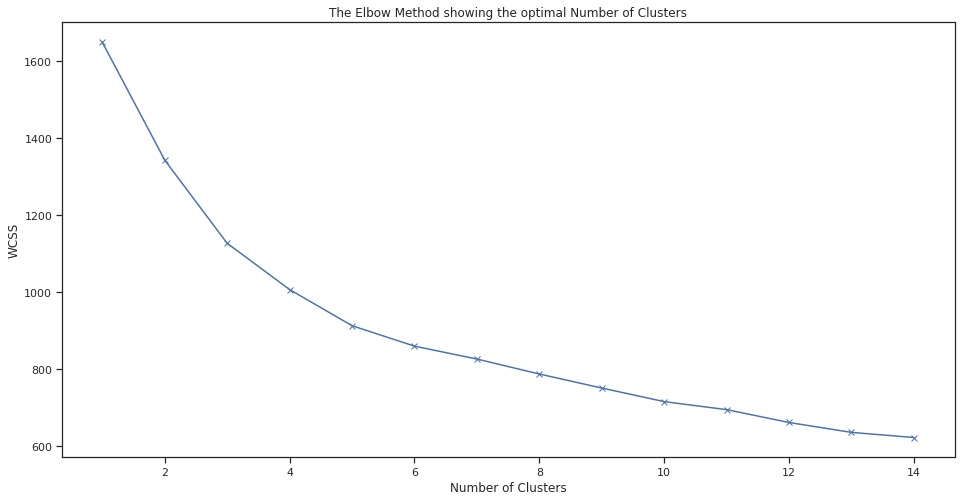

In [52]:
plt.figure(figsize=(16,8))
plt.plot(K, WCSS, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal Number of Clusters')
plt.show()

From the above plot, we can see that the suitable number of clusters for this dataset is 3
#  Clustering with k-means method

In [53]:
kmeans_2f = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=42)
# fit kmeans object to data
kmeans_2f.fit(dfcluster)
# save the location of the centers of the clusters learned by kmeans object
center_2f=kmeans_2f.cluster_centers_
# save Labels of each point
y_2f = pd.DataFrame(kmeans_2f.labels_, index=dfcluster.index)
# Adding the labels to the overview table
data_long_A['Cluster']=y_2f
y_2f.value_counts()

2    69
1    50
0    31
dtype: int64



*   The three clusters have different numbers of data points
*   If there is a matching with Group then there should be a clear distinction of the values for group of the countries between these 

# Plotting scatterplot of the variables to see how the cluster relates to them










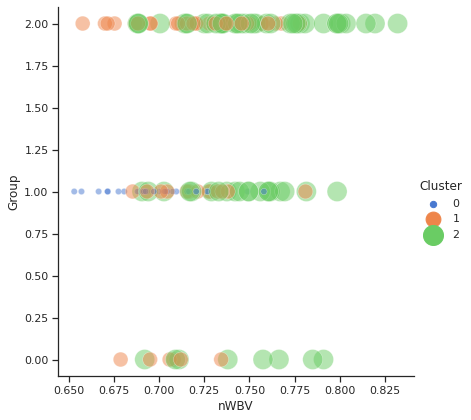

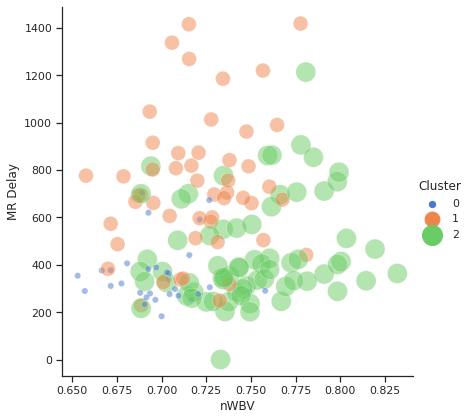

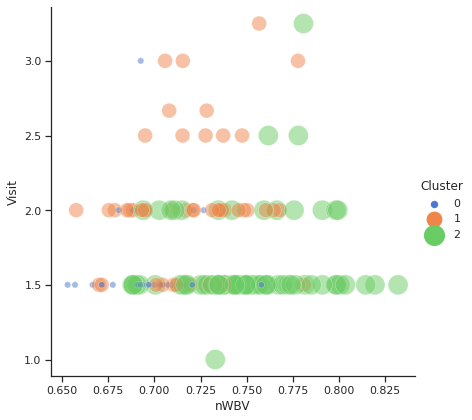

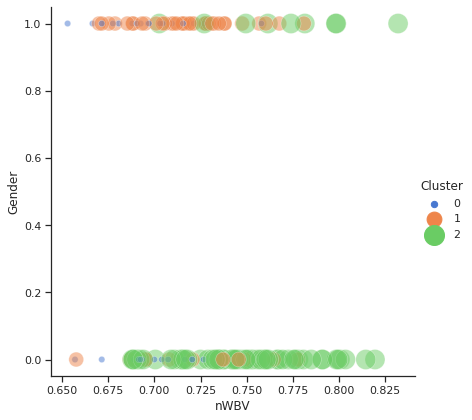

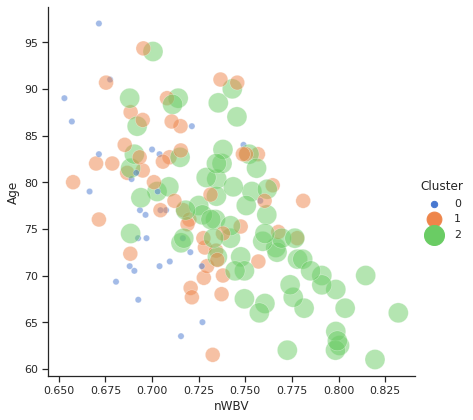

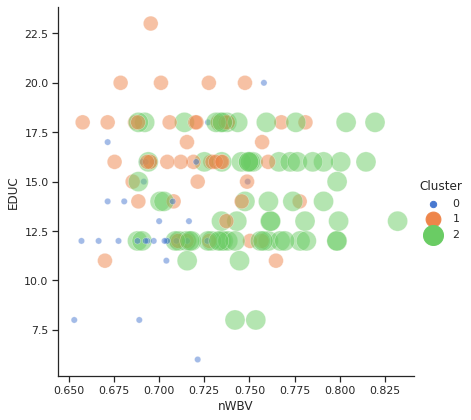

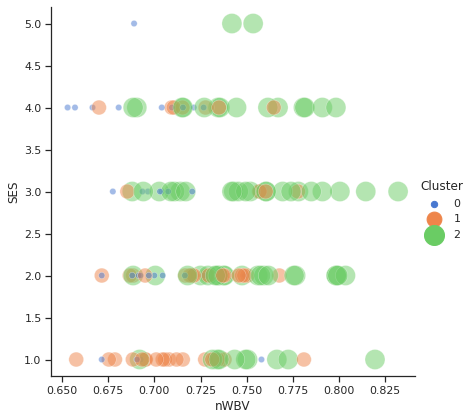

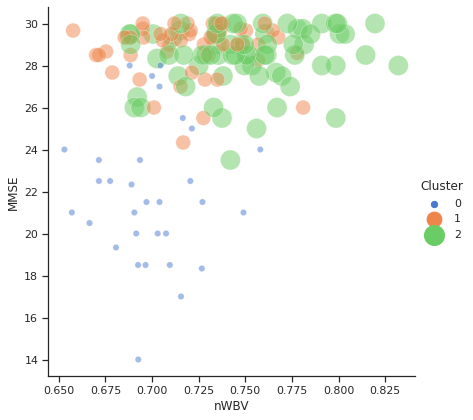

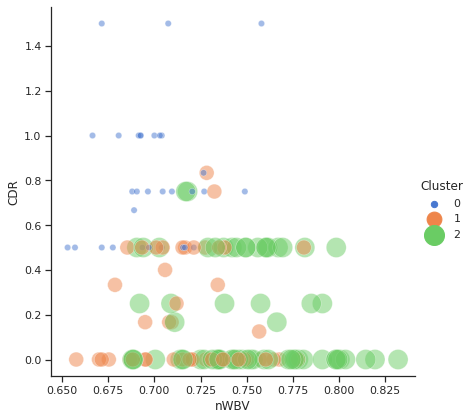

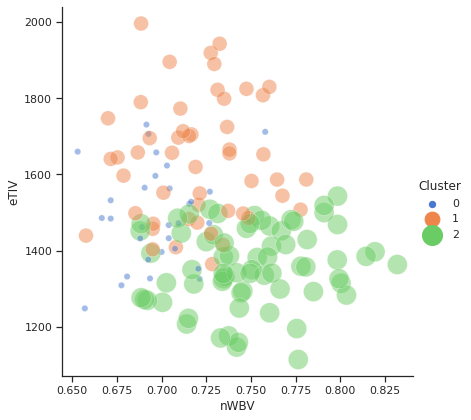

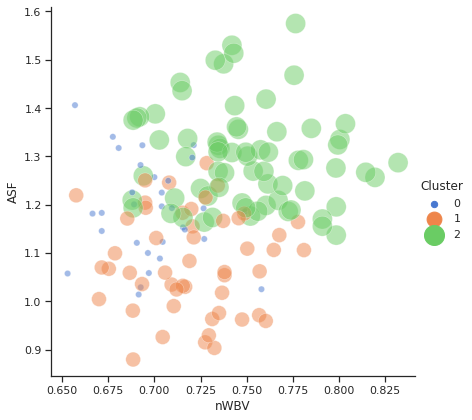

In [55]:
columns=['Group', 'MR Delay', 'Visit', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'ASF']
# Plotting the values of nWBV of all the sunjects, coloring the clusters
for col in columns:
    sns.relplot(x="nWBV", y=col, hue="Cluster", size="Cluster",
     sizes=(40, 400), alpha=.5, palette="muted",
        height=6, data=data_long_A)









* From the above plots that cluster = 1 showing mainly the subjects diagnosed as demented

* There is a clear pattern in the diagnosis of demented, nondemented and converted in the 'MMSE', 'CDR', 'ASF'



# Dimentionality Reduction
Reducing the dimensionality of our dataset to two dimensions is another method to visualize our clustering. Principal component analysis is
one method for reducing dimensionality (PCA).

In [56]:
# Defining the dataset X to be used
X=data_long_A.loc[:,['Group', 'MR Delay', 'Visit', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

In [57]:
X.shape

(150, 12)

In [58]:
data_long_A.shape

(150, 13)

In [59]:
X.head()

,Group,MR Delay,Visit,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
OAS2_0001,2.0,228.500000,1.500000,1.0,87.500000,14.0,2.0,28.500000,0.000000,1995.500000,0.688500,0.879500
OAS2_0002,1.0,818.333333,2.000000,1.0,77.000000,12.0,2.0,24.333333,0.500000,1704.666667,0.716667,1.030000
OAS2_0004,2.0,269.000000,1.500000,0.0,89.000000,18.0,3.0,27.500000,0.000000,1207.500000,0.714000,1.453000
OAS2_0005,2.0,871.000000,2.000000,1.0,82.666667,12.0,4.0,29.000000,0.166667,1696.333333,0.709333,1.034667
OAS2_0007,1.0,599.666667,2.666667,1.0,73.000000,16.0,2.0,27.333333,0.833333,1364.666667,0.728333,1.286000


In [60]:
# PCA is sensitive to different scaling in the data. We therefore need to use a scaler first.
sc=StandardScaler()
X_std=sc.fit_transform(X)
# defining PCA
pca=PCA(n_components=2)
# carrying out the dimension reduction from d=12 to k=2 dimensions
X_pca=pca.fit_transform(X_std)


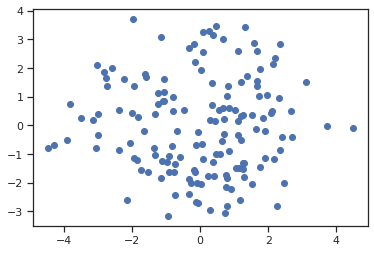

In [61]:
# Testing to plot the x and y values of the two dimensions
plt.scatter(X_pca[:,0],X_pca[:,1])

#Scatterplot of reduced dimensions
As the figure above illustrates, we succeeded in reducing the dimensions from 13 to 2. Since the index of the reduced data is still the same,
we can add the information regarding our cluster and use it for coloring and labeling.


In [62]:
# Preparing a dataframe that will be used to perform the scatter plot while coloring with the clusters
dfX2 = pd.DataFrame(X_pca, index=X.index, columns=['x','y'])
dfX2.head(3)


,x,y
Subject ID,,
OAS2_0001,-2.756188,1.642748
OAS2_0002,-1.620033,1.804456
OAS2_0004,1.775211,-1.460647


In [63]:
#Adding the columns for the clusters
dfX2.loc[:,'Cluster']=y_2f
dfX2.head(2)


,x,y,Cluster
Subject ID,,,
OAS2_0001,-2.756188,1.642748,1
OAS2_0002,-1.620033,1.804456,1


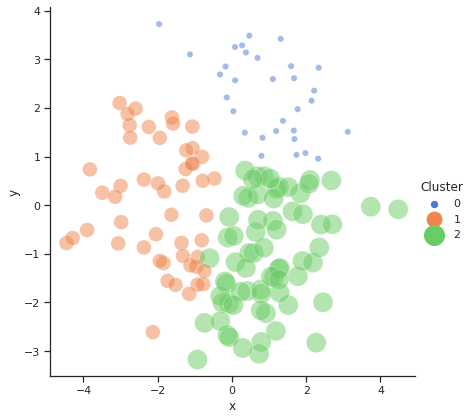

In [64]:
#Example: scatter plot two clusters in the reduced dimension of the dataset
sns.relplot(x="x", y="y", hue="Cluster", size="Cluster",
sizes=(40, 400), alpha=.5, palette="muted",
height=6, data=dfX2)




*   The three clusters are clearly seperated, with cluster 2 in the right side, cluster 1, in the left side and cluster 0 in the top of the plane.
*   This also illustrates that the dimension reduction preserves the approximaty between data points.



In [65]:
# Adding group to the data
dfX2.loc[:,'Group']=data_long_A['Group']

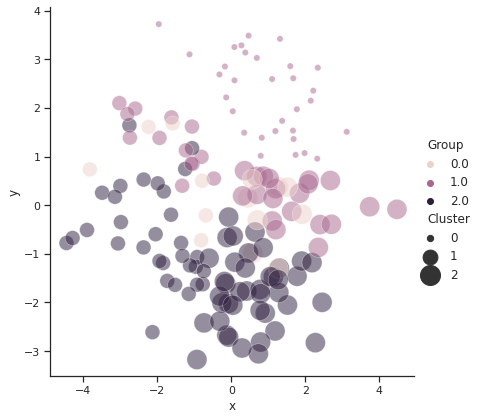

In [66]:
#Example: scatter plot two clusters in the reduced dimension of the dataset colored by life expectancy
sns.relplot(x="x", y="y", hue="Group", size="Cluster",
sizes=(40, 400), alpha=.5,
height=6, data=dfX2)




*  The coloring of the three clusters with the data from group shows that cluster 1 and 2 contains the data points with subjects diagnosed as
nondemented.
* Cluster 0 contains mainly data points of subjects who were diagnosed as demented.
* The areas in the middle of all the clusters we can see those who were initially diagnosed as nondemented but subsequently diagnosed
as demented in further visits.




#labelling data points belonging to clusters
By adding the labels to the points we can find out which test subjects belong to which group.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'y')

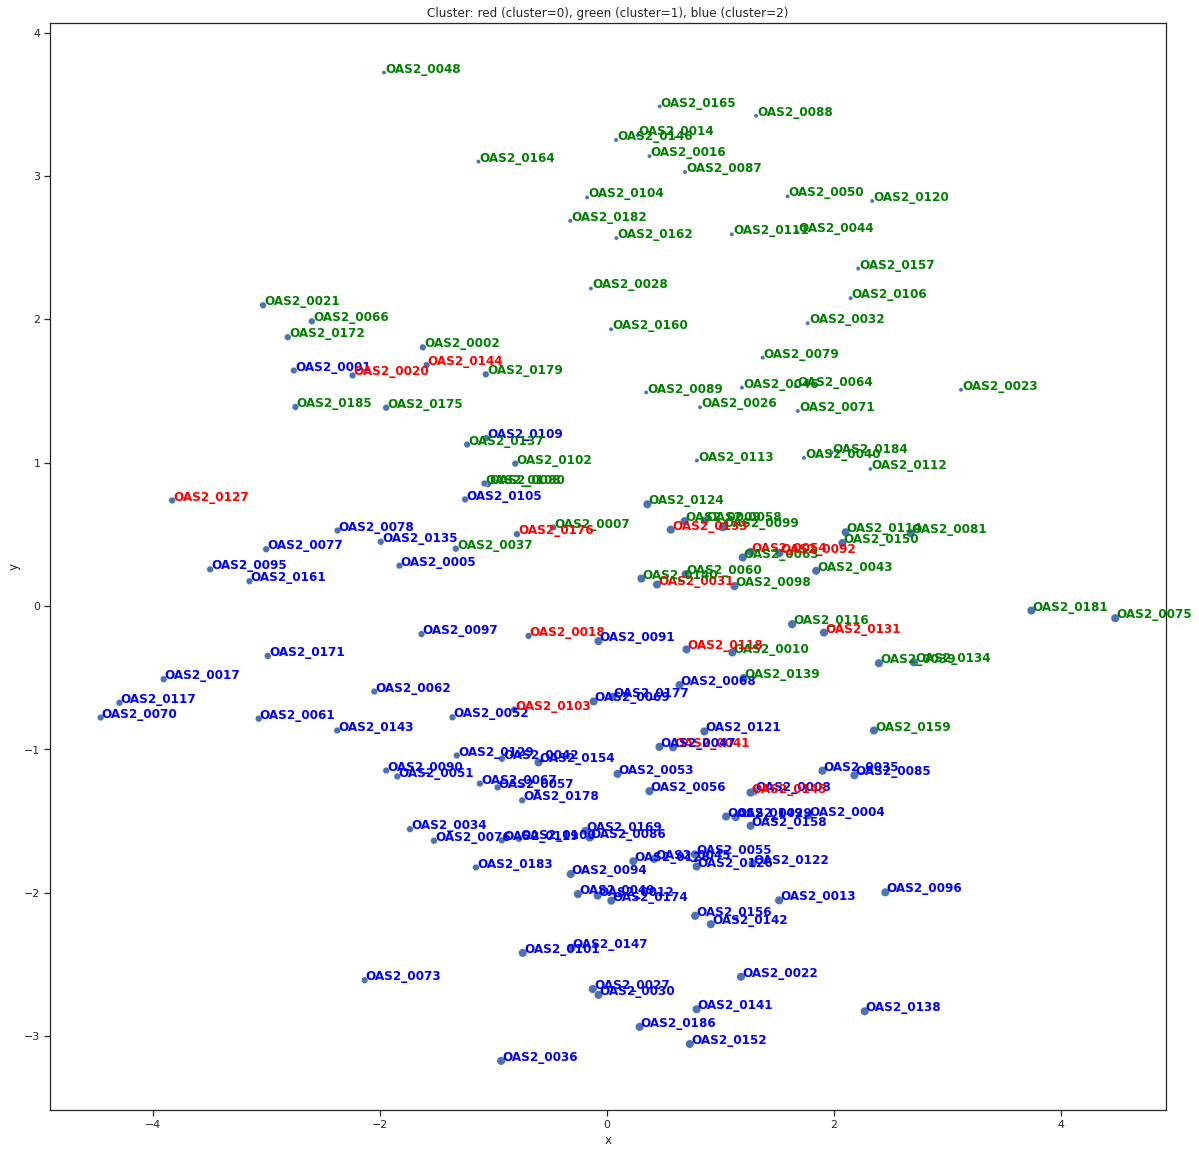

In [68]:
#Labeling the Subjects belonging to cluster 0, 1 and 2 in Cluster
plt.figure(figsize=(20,20))
p1 = sns.scatterplot('x', # Horizontal axis
       'y', # Vertical axis
        data=dfX2, # Data source
        size = 'Cluster',
        legend=False)
for line in range(0,dfX2.shape[0]):
        #cluster: 0=>red, 1=>green, 2 =>blue
        c=dfX2.iloc[line,3]
        if c==0:
              p1.text(dfX2.iloc[line,0]+0.01, dfX2.iloc[line,1],
                      dfX2.index[line], horizontalalignment='left',
                      size='medium', color='red', weight='semibold')
        if c==1:
             p1.text(dfX2.iloc[line,0]+0.01, dfX2.iloc[line,1],
                      dfX2.index[line], horizontalalignment='left',
                      size='medium', color='green', weight='semibold')
        if c==2:
             p1.text(dfX2.iloc[line,0]+0.01, dfX2.iloc[line,1],
                     dfX2.index[line], horizontalalignment='left',
                     size='medium', color='blue', weight='semibold')
plt.title('Cluster: red (cluster=0), green (cluster=1), blue (cluster=2)')
# Set x-axis label
plt.xlabel('x')
# Set y-axis label
plt.ylabel('y')
